# Module 4 Assignment


A few things you should keep in mind when working on assignments:

1. Before you submit your assignment, make sure everything runs as expected. Go to the menubar, select Kernel, and Restart & Run all. 
2. Make sure that you save your work.
3. Upload your notebook to Compass.

-----


# Prepare Breast Cancer Data

In this assignment we will use the breast cancer dataset. Before we attempt to build models, we first prepare the data.

Please run the next two code cells before proceeding to Problem 1.

-----

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Load breast cancer dataset
df = pd.read_csv('breast-cancer-wisconsin.csv')
label = LabelEncoder().fit_transform(df['class'])
data = df[['clump thickness', 'uniformity cell size', 'uniformity cell shape', 'marginal adhesion', 'epithelial cell size', 'bare nuclei', 'bland chromatin', 'normal nucleoli', 'mitoses']]
d_train, d_test, l_train, l_test = train_test_split(data, label, test_size=0.3, random_state=23)
d_train.sample(2)

,clump thickness,uniformity cell size,uniformity cell shape,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses
231,8,10,10,8,6,9,3,10,10
582,5,1,3,1,2,1,3,1,1


In [2]:
# Cancer classes
df['class'].unique()

array([2, 4])


---

# Problem 1: Perform K-Nearest Neighbors Classification

Your task for this problem is to build and use the scikit learn library's `KNeighborsClassifier` estimator to make predictions on the breast cancer dataset. 

To complete the task, do the following:

1. Import needed modules.
2. Create a `KNeighborsClassifier` estimator **knn_model** by using scikit learn. Set n_neighbors to 10 and accept default values for other hyperparameter.
3. Fit the `KNeighborsClassifier` estimator using d_train and l_train created above.
4. Calculate the mean accuracy score of the knn_model and assign the value to variable **knn_score**.
 - Apply knn_model on d_test to get predicted value.
 - Use `accuracy_score` function in sklearn module to calculate the mean accuracy score.
5. Print the mean accuracy score.
6. Print the classification report.

After this problem, there will be a trained K-Nearest Neighbors Classifier **knn_model** and accuracy score __knn_score__.

-----

In [3]:
# Your answer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Create and fit our K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(d_train, l_train)
l_pred = knn_model.predict(d_test)
knn_score = metrics.accuracy_score(l_test, l_pred)
print(knn_score)
print(metrics.classification_report(l_test, l_pred))

0.9853658536585366
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       127
           1       0.99      0.97      0.98        78

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.98       205
weighted avg       0.99      0.99      0.99       205



---

# Problem 2: Create and Train a Logistic Regression Model

Your task for this problem is to build and use the scikit learn library's `LogisticRegression` estimator to make predictions on the breast cancer dataset.  

To complete the task, do the following:
1. Import needed modules.
2. Create a `LogisticRegression` estimator **lr_model** by using scikit learn. Accept default values for all arguments.
3. Fit the `LogisticRegression` estimator using d_train and l_train.
4. Calculate the mean accuracy score of the lr_model.
 - Apply lr_model on d_test to get predicted value.
 - Use `accuracy_score` function in sklearn module to calculate the mean accuracy score.
5. Display the mean accuracy score.

After this problem, there will be a trained logistic regression model **lr_model** defined.

-----

In [4]:
# Your answer
from sklearn.linear_model import LogisticRegression

# Create and fit our logistic regression model to training data
lr_model = LogisticRegression()
lr_model.fit(d_train, l_train)
l_pred = lr_model.predict(d_test)
lr_score = metrics.accuracy_score(l_pred, l_test)
lr_score

0.975609756097561

---

# Problem 3: Get Confusion Matrix

For this problem, you will get the confusion matrix of the lr_model created in Problem 2.

To complete the task, do the following:

1. Run next code cell to define the function `confusion` which plots a confusion matrix.
2. Apply lr_model `predict` function to d_test to get predicted label, assign it to variable **l_pred**.
3. Plot the confusion matrix using `confusion` function with the true lable **l_test** and predicted label __l_pred__. Set labels to `['Class 2', 'Class 4']`.

-----

In [5]:
import numpy as np
import seaborn as sns
def confusion(test, predict, labels, title='Confusion Matrix'):
    '''
        test: true label of test data, must be one dimensional
        predict: predicted label of test data, must be one dimensional
        labels: list of label names, ie: ['positive', 'negative']
        title: plot title
    '''

    bins = len(labels)
    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int), index=labels, columns=labels )
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")    
    hm.axes.set_title(title, fontsize=20)
    hm.axes.set_xlabel('Predicted', fontsize=18)
    hm.axes.set_ylabel('Actual', fontsize=18)

    return None

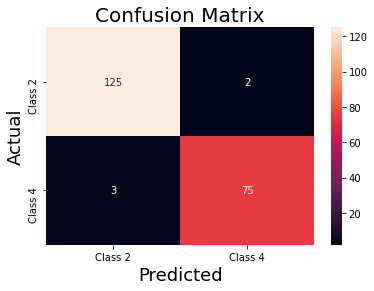

In [6]:
# Your answer

l_pred = lr_model.predict(d_test)
confusion(l_test, l_pred, ['Class 2', 'Class 4'])

---
# Problem 4: Prepare for ROC Curve - KNN

For this problem, you will prepare data for the ROC curve for the K-Nearest Neighbors classification model **knn_model** created in Problem 1.

To complete the task, do the following:
1. Import needed modules.
2. Calculate the positive class probability of the knn_model with `predict_proba` method and assign it to variable **y_score_knn**.(Hint: the 2nd column of `predict_proba` return value is the positive probability, ie. `knn_model.predict_proba(d_test)[:, 1]`.)
3. Calculate the false positive rate, true positive rate and thresholds with `roc_curve` function. Assign return values of `roc_curve` to **fpr_knn, tpr_knn** and __thresholds_knn__.
4. Get auc value with `auc` function and assign it to variable **roc_auc_knn**.
5. Display **roc_auc_knn**.

After this problem, you will have following variables defined: **y_score_knn, fpr_knn, tpr_knn, thresholds_knn** and __roc_auc_knn__.

In [7]:
# Your answer
from sklearn.metrics import roc_curve, auc
# Grab positive class probability
y_score_knn = knn_model.predict_proba(d_test)[:, 1]

# Compute ROC curve and ROC area
fpr_knn, tpr_knn, thresholds_knn = roc_curve(l_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_knn

0.9978800726832222

---
# Problem 5: Prepare for ROC Curve - Logistic Regression

For this problem, you will prepare data for the ROC curve for the Logistic Regression model **lr_model** created in Problem 2.

To complete the task, do the following:
1. Import needed modules.
2. Calculate the positive class probability of the lr_model with `decision_function` method and assign it to variable **y_score_lr**.
3. Calculate the false positive rate, true positive rate and thresholds with `roc_curve` function. Assign return values of `roc_curve` to **fpr_lr, tpr_lr** and __thresholds_lr__.
4. Get auc value with `auc` function and assign it to variable **roc_auc_lr**.
5. Display **roc_auc_lr**.

After this problem, you will have following variables defined: **y_score_lr, fpr_lr, tpr_lr, thresholds_lr** and __roc_auc_lr__.

In [8]:
# Your answer
# Grab positive class probability
y_score_lr = lr_model.decision_function(d_test)

# Compute ROC curve and ROC area
fpr_lr, tpr_lr, thresholds_lr = roc_curve(l_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lr

0.9959620432061378

## Plot ROC Curve

Run following code to plot the ROC curve after you complete all problems above. If you answer all problem correctly, you should see an ROC plot for the two classification models created in Problem 1 and 2.

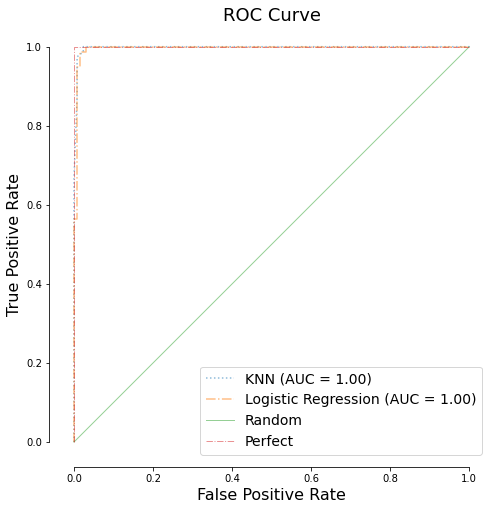

In [9]:
import matplotlib.pyplot as plt
# Make the plots
fig, ax = plt.subplots(figsize=(8, 8))

# Plot data and model

ax.plot(fpr_knn, tpr_knn, alpha = 0.5, linestyle=':',
        label=f'KNN (AUC = {roc_auc_knn:4.2f})')

ax.plot(fpr_lr, tpr_lr, alpha = 0.5, linestyle='-.',
        label=f'Logistic Regression (AUC = {roc_auc_lr:4.2f})')


ax.plot([0, 1], [0, 1], alpha = 0.5, lw=1, linestyle='-', label='Random')
ax.plot([0, 0, 1], [0, 1, 1], alpha = 0.5, lw=1, linestyle='-.', label='Perfect')

# Decorate plot appropriately
ax.set_title('ROC Curve', fontsize=18)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect('equal')
ax.legend(loc=4, fontsize=14)
sns.despine(offset=5, trim=True)